## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [78]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-09-08 15:06:55 (KST = GMT+0900) 
0 Python     3.12.3 64bit [GCC 11.2.0]
1 IPython    8.25.0
2 OS         Linux 5.15.0 119 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.4
6 scipy      1.13.1
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [79]:
#%%
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u

from astropy.io import fits
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter, LevMarLSQFitter
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

"CAL-BDF" 폴더 찾기

In [106]:
#%%
BASEDIR = Path("/mnt/Rdata/ASTRO_data") 
PROJECDIR = BASEDIR/ "2024-Spectra"
TODODIR = PROJECDIR / "TEC140_ASI183MMPro_2024-05_1bin"
# TODODIR = PROJECDIR / "_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

MASTERDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
MASTERDIR = Path(MASTERDIR[0]) / _astro_utilities.master_dir
print ("MASTERDIR: ", format(MASTERDIR))

BDFDIR = [x for x in DOINGDIRs if "SPTR-CAL_" in str(x)]
print ("BDFDIR: ", format(BDFDIR))

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
DOINGDIRs = sorted([x for x in DOINGDIRs if not "SPTR-CAL_" in str(x)])
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

filter_str = 'VEGA'
DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TE

# Set varibales

In [107]:
#######################################################
ylow, yhigh = 1775, 1910 
wei_ylow, wei_yhigh = 1800, 1880
xhigh = 4200

# start by taking +/- 15 pixels
npixels_to_cut = 15
npixels = 20

guessed_wavelengths = [667.728, 640.2, 585.2]  # Ar, Ne, Ne
guessed_xvals = [600, 970, 1550]
calfile_idx = 0
#######################################################

## Cal file Summary

In [108]:
BDFDIR = Path(BDFDIR[0])
print("BDFDIR", BDFDIR)

summary_cal = yfu.make_summary(BDFDIR / "*.fit*")
if summary_cal is not None : 
    #print(summary)
    print("len(summary_cal):", len(summary_cal))
    print("summary_cal:", summary_cal)
    #print(summary_cal["file"][0])

fpath_cal = Path(summary_cal["file"][calfile_idx])

BDFDIR /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin
All 49 keywords (guessed from /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/SPTR-CAL_LIGHT__2024-05-14-06-15-05_2sec_TEC140_ASI183MMPro_-9c_1bin.fit) will be loaded.
len(summary_cal): 69
summary_cal:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  40368960    True   
1   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  40368960    True   
2   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  40368960    True   
3   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  40368960    True   
4   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  40368960    True   
..                                                ...       ...     ...   
64  /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  4

## light Summary

In [109]:
for DOINGDIR in DOINGDIRs[:1] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    READINGDIR = DOINGDIR / "reduced"
    TRACERESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_trace"

    fpaths = sorted(list((TRACERESULTDIR).glob('*.txt')))
    print(f"fpaths: {fpaths}")
    print(f"len(fpaths): {len(fpaths)}")
    #print(summary["file"][0])

DOINGDIR /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin
fpaths: [PosixPath('/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced_trace/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin_spctrum_result.txt'), PosixPath('/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced_trace/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-42_5sec_TEC140_ASI183MMPro_-20c_1bin_spctrum_result.txt'), PosixPath('/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced_trace/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-49_5sec_TEC140_ASI183MMPro_-20c_1bin_spctrum_result.txt'), PosixPath('/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024

# Spectroscopic Data Reduction Part 3: Extracting the final wavelength-calibrated spectrum 

This tutorial assumes you have gone through the [Trace](1-SpectroscopicTraceTutorial.ipynb) and [Wavelength Calibration](2-WavelengthCalibration) tutorials and have their results available.

## Authors
Adam Ginsburg, Kelle Cruz, Lia Corrales, Jonathan Sick, Adrian Price-Whelan

## Learning Goals
* Extract a target 1D spectrum from a two-dimensional spectrum using an existing trace
* Apply a fitted wavelength solution to the data
* Fit a line profile to the wavelength-calibrated spectrum

## Keywords
Spectroscopy

## Summary
This tutorial, the third in a series, shows how to apply a trace and a wavelength solution to science data.  It then shows how to do basic analysis, i.e., line fitting.

## Extract the science spectrum

First, we repeat the trace-and-extract process derived in [Part 1](1-SpectroscopicTraceTutorial.ipynb), but now for Deneb:

In [110]:
# from PIL import Image as PILImage
# import numpy as np
# import pylab as pl
# plt.style.use('dark_background')

In [111]:
from astropy.modeling.models import Linear1D
from astropy import constants
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f37d0e0a9f0>

In [112]:
# image_array_2 = np.array(PILImage.open('deneb_3s_13.63g_1.bmp'))

In [113]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter, LinearLSQFitter
linfitter = LinearLSQFitter()

In [114]:
# yaxis2 = np.repeat(np.arange(470, 520)[:,None], image_array_2.shape[1], axis=1)
# xvals = np.arange(image_array_2.shape[1])
# weighted_yaxis_values2 = np.average(yaxis2, axis=0, weights=image_array_2[470:520,:] - np.median(image_array_2))
# polymodel2 = Polynomial1D(degree=3)
# fitted_polymodel2 = linfitter(polymodel2, xvals, weighted_yaxis_values2)
# trace_center2 = fitted_polymodel2(xvals)

In [115]:
# npixels_to_cut = 15
# trace_center = fitted_polymodel2(xvals)
# cutouts = np.array([image_array_2[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
#                     for yval, ii in zip(trace_center, xvals)])
# cutouts.shape
# mean_trace_profile = cutouts.mean(axis=0)

In [116]:
# spectrum2 = np.array([np.average(image_array_2[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
#                                 weights=mean_trace_profile)
#                      for yval, ii in zip(trace_center2, xvals)])

Next, we retrieve the wavelength solution derived in Part 2.

In [117]:
# wlmodel = Linear1D(slope=-0.10213643, intercept=562.3862495)

In [118]:
# wavelengths = wlmodel(xvals) * u.nm

## 파일 읽기

In [119]:
fpath = Path(fpaths[0])

print(f"starting {fpath.name}")
result_dict = {}
with open(fpath, 'r') as f:
    for line in f:
        key, value = line.strip().split(':')
        print(key, value)
        try:
            value = float(value)
        except ValueError:
            pass
        result_dict[key.strip()] = value
result_dict
result_dict['xhigh']

starting SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin_spctrum_result.txt
ylow 1775
yhigh 1910
wei_ylow 1800
wei_yhigh 1880
xhigh 4200
npixels_to_cut 15
npixels 20
calibration file /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/SPTR-CAL_LIGHT__2024-05-14-06-15-05_2sec_TEC140_ASI183MMPro_-9c_1bin.fit
guessed_wavelengths [667.728, 640.2, 585.2]
guessed_xvals [600, 970, 1550]
improved_xval_guesses [599.0496685708512, 969.5156731700924, 1550.6461985324613]
fitted_polymodel.parameters [ 1.88125287e+03 -6.53792433e-03 -7.51794595e-06  1.23238149e-09]
wavelengths(unit) nm
wavelengths [721.9447500625719, 721.8573221191103, 721.7698941756487, 721.6824662321872, 721.5950382887256, 721.507610345264, 721.4201824018024, 721.3327544583409, 721.2453265148793, 721.1578985714177, 721.0704706279561, 720.9830426844945, 720.895614741033, 720.8081867975714, 720.7207588541098, 720.6333309106483, 720

4200.0

In [120]:
def str_to_numpy_array(string):
  """
  문자열을 NumPy 배열로 변환하는 함수

  Args:
    string: 변환할 문자열

  Returns:
    변환된 NumPy 배열
  """

  # 대괄호 제거
  string = string.strip('[]')

  # 쉼표로 분리하여 리스트 생성
  num_list = string.split(',')

  # 리스트를 NumPy 배열로 변환
  numpy_array = np.array(num_list, dtype=float)

  return numpy_array

In [121]:
wavelength = str_to_numpy_array(result_dict['wavelengths'])

In [124]:
wavelengths = str_to_numpy_array(result_dict['wavelengths']) * u.nm
spectrum2 = str_to_numpy_array(result_dict['Gaussian-model-Trace-weighted average'])
spectrum2 = str_to_numpy_array(result_dict['Direct average'])
spectrum2

array([78.84347534, 70.62187195, 79.15371704, ...,  6.02486134,
       15.35147476,  6.33083248])

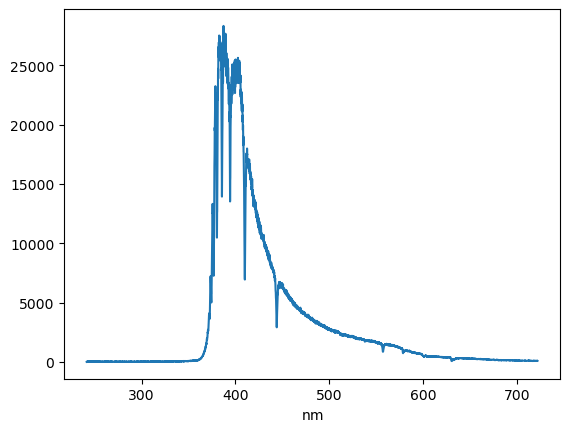

In [125]:
plt.plot(wavelengths, spectrum2)

# Analysis

Now, we go on to do some basic analysis on our fully extracted and wavelength-calibrated spectrum

We zoom in on the 4860 Angstrom line - H-Beta

(470.0, 510.0, 3000.0, 5000.0)

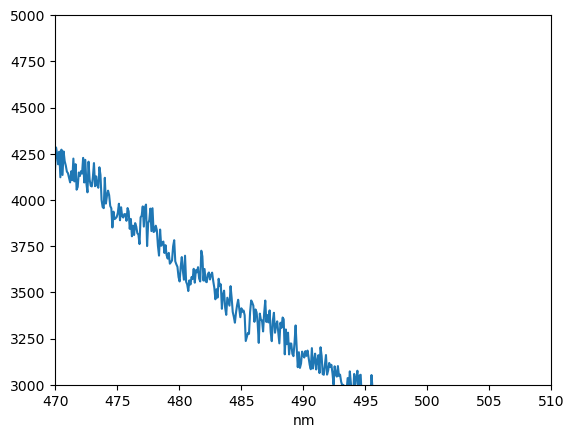

In [130]:
plt.plot(wavelengths, spectrum2)
plt.axis([470,510,3000,5000])

We can use astropy models to construct an absorption line model, consisting of a continuum level and a negative Gaussian to represent the absorption feature

In [ ]:
absorption_model_guess = Linear1D(slope=0, intercept=175) + Gaussian1D(amplitude=-25, mean=486, stddev=3)

We can overplot our guessed model - it's not right, but it's in the right spot

In [ ]:
plt.plot(wavelengths, spectrum2)
plt.plot(wavelengths, absorption_model_guess(wavelengths.value))
plt.axis([470,510,140,190])

The Levenberg-Marquardt Least Squares fitter can be used to find the optimal fit to our data given the starting guess.

In [ ]:
lmfitter = LevMarLSQFitter()
selection = (wavelengths > 470*u.nm) & (wavelengths < 500*u.nm) 
fitted_absorption_model = lmfitter(model=absorption_model_guess, x=wavelengths.value[selection], y=spectrum2[selection])

In [ ]:
plt.plot(wavelengths, spectrum2)
plt.plot(wavelengths, fitted_absorption_model(wavelengths.value))
plt.axis([470,510,140,190])

We can now separate out the two components, the continuum and the absorption line model:

In [ ]:
continuum_fit, absorption_fit = fitted_absorption_model

If we plot the data minus the absorption line model, we get a nice "line-free continuum":

In [ ]:
plt.plot(wavelengths, spectrum2)
plt.plot(wavelengths, spectrum2 - absorption_fit(wavelengths.value))
plt.axis([470,510,140,190])

The [Equivalent Width](https://en.wikipedia.org/wiki/Equivalent_width) of a spectral absorption line is defined to be the width of a feature that has the same integral as the absorption line, but goes all the way from the continuum level to zero.

We can compute this with our model, assuming our continuum is flat (has zero slope):

In [ ]:
EQW =  -absorption_fit(wavelengths.value[selection]).sum() / continuum_fit.intercept * u.nm
EQW

In [ ]:
absorption_fit

We have identified the line as H-beta, so we can measure some of its properties now:

In [ ]:
air_wavelength_hbeta = 486.135*u.nm # wikipedia https://en.wikipedia.org/wiki/Balmer_series

The Doppler Shift will tell us the velocity of the star.  Note that this is the velocity in the _topocentric_ frame, i.e., in the rest frame of the observatory.  If we knew precisely when and where these observations were taken, we could convert this velocity to the heliocentric or LSR frames with [astropy tools](https://docs.astropy.org/en/stable/coordinates/velocities.html).

First, we do the calculation manually, following the optical definition
$$v_{opt} = c \frac{\lambda-\lambda_0}{\lambda} $$

In [ ]:
doppler_velocity = (absorption_fit.mean*u.nm - air_wavelength_hbeta) / (air_wavelength_hbeta) * constants.c
doppler_velocity.to(u.km/u.s)

We can do the same thing using [astropy equivalencies](https://docs.astropy.org/en/stable/units/equivalencies.html#spectral-doppler-equivalencies):

In [ ]:
doppler_velocity = (absorption_fit.mean*u.nm).to(u.km/u.s, u.doppler_optical(air_wavelength_hbeta))
doppler_velocity

We can also compute the line width from our fit:

In [ ]:
linewidth_kms = (absorption_fit.stddev*u.nm) / air_wavelength_hbeta * constants.c.to(u.km/u.s)
linewidth_kms

That's it!  You've extracted and wavelength-calibrated a spectrum.

The next tricky step is flux calibration, but we will do that in a subsequent tutorial because we need a different data set; this one didn't include the necessary data for flux calibration (though we could approximately calibrate the spectrum using a known magnitude over the observed band for Deneb)